In [2]:
import pandas as pd
import matplotlib.pyplot as plt

transactions = pd.read_csv("C:\\Users\\palej\\Desktop\\FIUBA\\Organizacion de datos\\TP\\transactions_train.csv")

In [31]:
def tipo_transferencia(numero) -> str:
    if numero == 0:
        return "Legal"
    else:
        return "Fraude"
    
def cantidad_producto(letra) -> int:
    if letra == 'C' or letra == 'H' or letra == 'R' or letra == 'S' or letra == 'W':
        return 1
    else:
        return 0


In [32]:
analisis = transactions[["target", "ammount", "product_category"]]

In [33]:
analisis = analisis.rename(columns={"target":"Transferencia", "ammount":"Monto", "product_category":"Tipo de producto"})

In [34]:
analisis["Transferencia"] = analisis["Transferencia"].map(tipo_transferencia)

In [35]:
analisis["Cantidad"] = analisis["Tipo de producto"].map(cantidad_producto)

In [36]:
analisis_cantidad = analisis.pivot_table(values="Cantidad", index="Tipo de producto", columns="Transferencia", aggfunc=sum)

C:\Users\palej\AppData\Local\Temp\ipykernel_14408\970043778.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  analisis_cantidad = analisis.pivot_table(values="Cantidad", index="Tipo de producto", columns="Transferencia", aggfunc=sum)


In [37]:
analisis_cantidad = analisis_cantidad.reset_index()

In [38]:
analisis_cantidad

Transferencia,Tipo de producto,Fraude,Legal
0,C,6738,52393
1,H,1410,29052
2,R,1214,32295
3,S,542,8113
4,W,7676,362526


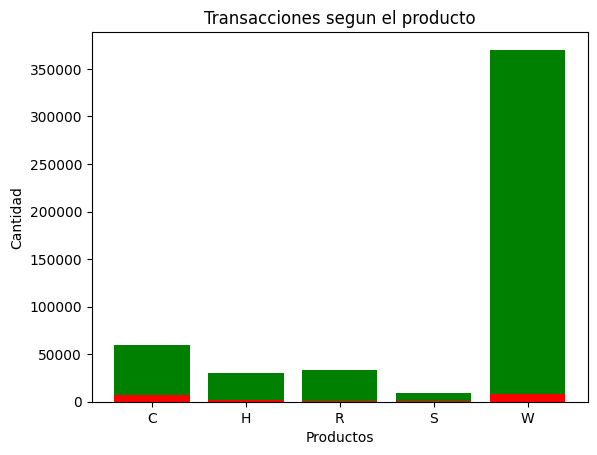

In [41]:
plt.bar(analisis_cantidad["Tipo de producto"], analisis_cantidad["Fraude"], color='red')
plt.bar(analisis_cantidad["Tipo de producto"], analisis_cantidad["Legal"], bottom=analisis_cantidad["Fraude"], color='green')
plt.title("Transacciones segun el producto")
plt.xlabel("Productos")
plt.ylabel("Cantidad")
plt.show()